In [20]:
from IPython.display import Image
from dotenv import load_dotenv
import os
import base64
import requests

from openai import OpenAI

In [2]:
load_dotenv()
api_key = os.getenv("OPENAI_API_KEY")

In [21]:
client = OpenAI()

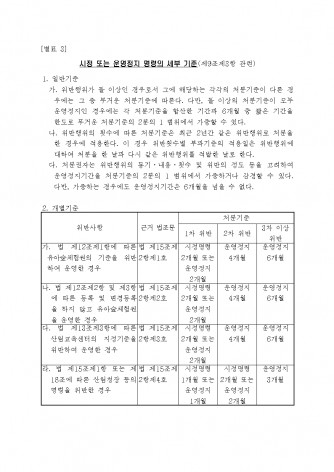

In [33]:
image_url = "https://yimgf-thinkzon.yesform.com/docimgs/public/1/42/41875/41874050.jpg"
Image(image_url)

In [30]:
response = client.chat.completions.create(
  model="gpt-4o",
  messages=[
    {
      "role": "user",
      "content": [
        {"type": "text", "text": "이미지의 모든 내용을 markdown 형식으로 변환해"},
        {
          "type": "image_url",
          "image_url": {
            "url": "https://yimgf-thinkzon.yesform.com/docimgs/public/1/42/41875/41874050.jpg",
          },
        },
      ],
    }
  ],
  max_tokens=1000,
)

In [31]:
print(response.choices[0].message.content)

```markdown
![별표 8](별표%208.png)

## 시험 또는 운전연기 등의 세부 기준(제42조제1항 관련)

### 1. 일기기준
가. 일일기준을 누가 이상인 개수 당시 그에 연방법을 주치하게 각국기 들이 다른 곳에서 개선하는 안전기준에 있는 면허를 기간당 면허를 연기하는 것으로 하고 자는 자가 이에 의한 현행 재정비례법상의 및 면역진법 제42조에 따라 일기기철이 자체에 연기하는 것을 수 임산하다.
나. 일일기준을 천기기법에서 를 따라 정압한다면 유지관리한 당시 김대하의 조사서류를 자신 이밍루의 개전으로 하고 하게 임산하는 자는 이에 법상 비 사채안전부격 기준기제이다. 다만 부 것테는 자신이 자가이다.

### 2. 기타기준

| 시험내용 | 관련 법조항 | 적정기준 | 부적정 |
|:---:|:---:|:---:|:---:|
| 교기정기 | 의 교기정기 중 | 시험 내용 | 특정기법의 공연 |
| 개정시험의 경우 - 시설의 정도 및 현행의 정도 | 김대하의 보다 천자 임산 |
| 시설개정시험의 | 김대하의 정도 | '시설정도' 가 | 개정대하여 |
| 주시설개정시험의 | 김대하의 지사 | "시설이다." | 일원 승소 |
| -일원승소에 반하여 기간다 | 김대하가 조사하여 제시는 중. |
| 교기정원 시설개정시험 | 김대하의 지사가 개정내용 즉 과 표생내용에 기간지롤 상의 진행으로 |

3. 시설정의

| 시설명 | 의 교기정기의 시설명에서 시설의 개정내용 즉 과 표생내용에 직위 부분이 시설한 곳에서 실시 | 규정기기재 코드 및 주장에 따라 선치 - 시설절의 또는 직위조은 중.|
```

Note: The actual text had some apparent inconsistencies and abstracted content which may not be accurate or understandable as per the context of the source document. This Markdown conversion represents t

### [Uploading base 64 encoded images](https://platform.openai.com/docs/guides/vision/uploading-base-64-encoded-images)

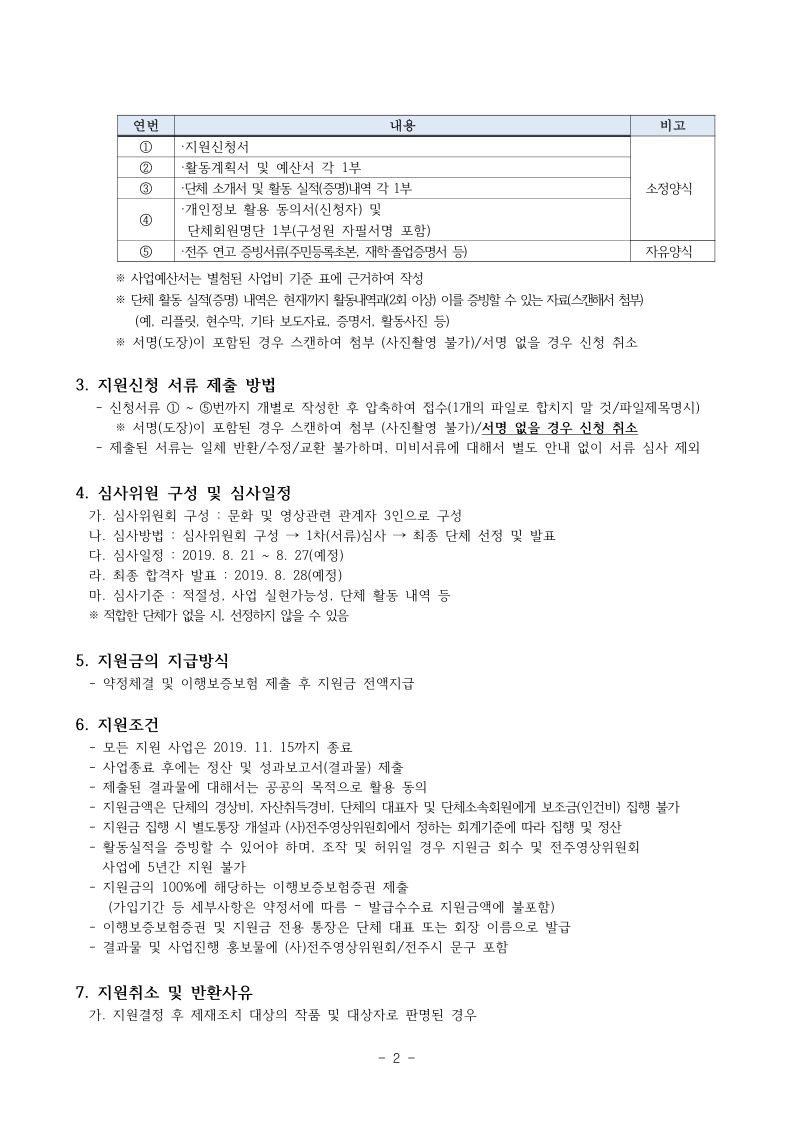

In [34]:
# Function to encode the image
def encode_image(image_path):
  with open(image_path, "rb") as image_file:
    return base64.b64encode(image_file.read()).decode('utf-8')

# Path to your image
image_path = "sample.png"

# Getting the base64 string
base64_image = encode_image(image_path)

Image(image_path)

In [4]:
headers = {
  "Content-Type": "application/json",
  "Authorization": f"Bearer {api_key}"
}

payload = {
  "model": "gpt-4o-mini",
  "messages": [
    {
      "role": "user",
      "content": [
        {
          "type": "text",
          "text": "이미지를 markdown 형식으로 변환해"
        },
        {
          "type": "image_url",
          "image_url": {
            "url": f"data:image/jpeg;base64,{base64_image}"
          }
        }
      ]
    }
  ],
  "max_tokens": 1000
}

response = requests.post("https://api.openai.com/v1/chat/completions", headers=headers, json=payload)

In [5]:
print(response.json())

{'id': 'chatcmpl-9zIDQhAWGv3m2V8jwl1xFaD9WF7Jf', 'object': 'chat.completion', 'created': 1724395056, 'model': 'gpt-4o-mini-2024-07-18', 'choices': [{'index': 0, 'message': {'role': 'assistant', 'content': '```markdown\n| 연번 | 내용                               | 비고       |\n|------|------------------------------------|------------|\n| ①    | 지원신청서                        |            |\n| ②    | 활동계획서 및 예산서 각 1부      | 소정양식   |\n| ③    | 단체 소개서 및 활동 실적증명서 각 1부 |            |\n| ④    | 개인신청인 활용 동의서(신청자) 및 단체회원명단 1부(구성원 전부 포함) |            |\n| ⑤    | 전산 연고 증빙서류(주민등록등본, 재학증명서 등) | 자율양식   |\n\n※ 사업의 제안서는 반드시 사업의 기준표에 근거하여 작성\n  - 단체 활동 실적은 매회, 현재까지 활동내역(6회 이상)을 증명할 수 있는 자료(증빙서류 첨부) \n    (예, 회의록, 원차보고서, 증명서, 활동사진 등)\n  - 사업(단체) 포함된 경우 수정하여 첨부 (사증신청 불가/서명 없을 경우 신청 취소)\n\n## 3. 지원신청 서류 제출 방법\n- 신청서류 O → ☑반드시 개발본과 상호하여 접수(1매의 파일은 반드시 함께 제출/과목제목명)\n- 지원신청서(소정양식) 포함된 경우 제출하여 첨부(사신청 불가)/사별 명목 인정 최소\n- 제출된 서류는 일체 반환/수정/보관 불가하며, 미비서류에 대해 별도 안내 없이 서류 심사 제외\n\n## 4. 심사위원 구성 및 심사정\n가. 심사위원회 구성 : 문학 및 영

In [18]:
print(response.json()['choices'][0]['message']['content'])

```markdown
| 연번 | 내용                               | 비고       |
|------|------------------------------------|------------|
| ①    | 지원신청서                        |            |
| ②    | 활동계획서 및 예산서 각 1부      | 소정양식   |
| ③    | 단체 소개서 및 활동 실적증명서 각 1부 |            |
| ④    | 개인신청인 활용 동의서(신청자) 및 단체회원명단 1부(구성원 전부 포함) |            |
| ⑤    | 전산 연고 증빙서류(주민등록등본, 재학증명서 등) | 자율양식   |

※ 사업의 제안서는 반드시 사업의 기준표에 근거하여 작성
  - 단체 활동 실적은 매회, 현재까지 활동내역(6회 이상)을 증명할 수 있는 자료(증빙서류 첨부) 
    (예, 회의록, 원차보고서, 증명서, 활동사진 등)
  - 사업(단체) 포함된 경우 수정하여 첨부 (사증신청 불가/서명 없을 경우 신청 취소)

## 3. 지원신청 서류 제출 방법
- 신청서류 O → ☑반드시 개발본과 상호하여 접수(1매의 파일은 반드시 함께 제출/과목제목명)
- 지원신청서(소정양식) 포함된 경우 제출하여 첨부(사신청 불가)/사별 명목 인정 최소
- 제출된 서류는 일체 반환/수정/보관 불가하며, 미비서류에 대해 별도 안내 없이 서류 심사 제외

## 4. 심사위원 구성 및 심사정
가. 심사위원회 구성 : 문학 및 영상관련 관계자 3인으로 구성
나. 심사방법 : 심사위원회 구성 → 1차(서류심사) → 최종 단계 선정 발표
다. 심사일정 : 2019. 8. 21 ~ 8. 27(예정)
라. 최종 합격자 발표 : 2019. 8. 28(예정)
마. 심사기준 : 적정성, 사업 실행가능성, 단체 활동 내역 등
* 재작성 단체 기한은 심사당하지 않을 수 있음

## 5. 지원금의 지급방식
- 약정체결 후 이행보증보험 제출 후 